## hw1pr1: <i>Files!</i>
+ walking through folders and files  (500 files - or many more!)
+ analyzing, counting, inquiring, and <i>insight-producing</i> as we go!  

In [2]:
# Where are we?
%pwd

'/Users/amandadee/Desktop/week1/starting_notebooks'

By the way, when I run the above cell on my desktop machine (Mac), the response is

``'/Users/zacharydodds/Desktop/cs35/week1/starting_notebooks'``

on a Windows laptop, the path uses a different separator. Mine is

``'c:\\Users\\dodds\\OneDrive\\Desktop\\cs35\\week1\\starting_notebooks'``

Your results will almost certainly differ.

In fact, if they *don't* differ ... I'm _very_ interested! 🤔 🦔

In [1]:
# what's here?
%ls

get_files_challenge_and_place_here/ intro_first/
hw1pr0.ipynb                        intro_first_ss_small.png
hw1pr1.ipynb                        intro_second/


In [3]:
# to move around:  cd stands for "change directory" (a directory is a folder)
#    %cd intro_first    would move into the intro_first folder
#    %cd .. moves "up" to the containing directory
#    %cd .  doesn't move at all:  .  represents the current directory    

# For now, let's not move anywhere
%cd .

/Users/amandadee/Desktop/week1/starting_notebooks


In 2024, my Mac setup succeeds with a ``UserWarning`` that tells me to install the ``pickleshare`` library.

I refuse based on snack-sharing principles!

One can only share freely, not under admonishment/warning!

(If this happens to you - let me know and we'll fix it...)

In [3]:
# we will use a few file-handling "system" libraries. 
# These are built-in to python, so nothing to install - just to import:
import os
import os.path

On first glance, it seems we can't open the file ``nottrue.ipynb`` ...

It's in the folder ``intro_first`` -- see if you can open it ...

In [26]:
#
# In fact, we can read it - it's just not a .ipynb file!
#
# Try it here, for your system:

print("+++ Contents of the file nottrue.ipynb: +++\n")

# Mac:    !cat  <filepath>  using forward slashes
#
# !cat ./intro_first/nottrue.ipynb       

# Windows:  type <filepath>  using backslashes
#
# !type .\\intro_first\\nottrue.ipynb      

L = os.walk("./intro_first/nottrue.ipynb") #root
final_list = list(L)
print(f"{final_list = }")

+++ Contents of the file nottrue.ipynb: +++

final_list = []


We *could* use the command-line ``cat`` or ``type`` one file at a time ...

But, what if we have to walk _500 files_ ?!  <font size="-2">(Alas, this joke stays around for at least this whole week!)</font>

  + Then, we need a function - and script - to access its contents. 
  + We started this last week, let's revisit it again here:

In [27]:
#
# function to return the contents of a file (as one-big-string)
#

def GET_STRING_FROM_FILE(filename_as_string):
    """ return all of the contents from the file, filename
        will error if the file is not present, then return the empty string ''
    """
    try:
        # the encoding below is a common default, but not universal...
        file_object = open(filename_as_string, "r", encoding='utf-8')    # open! (Other encodings: 'latin-1', 'utf-16', 'utf-32') 
        file_data = file_object.read()                                   # and get all its contents
        file_object.close()                                              # close the file (optional)
        #print(DATA)                                                     # if we want to see it
        return file_data                                                 # definitely want to return it!
    except FileNotFoundError:                             # it wasn't there
        print(f"file not found: {filename_as_string}")    # print error
        return ''                                         # return empty string ''
    except UnicodeDecodeError:
        print(f"decoding error: {filename_as_string}")    # encoding/decoding error  
        return ''                                         # return empty string ''


full_file_path = "./intro_first/nottrue.ipynb"
file_contents = GET_STRING_FROM_FILE(full_file_path)      # reminder: file_contents = file_data from above

# Let's print only some of this potentially large string, adapting as needed:
print("file_contents:\n\n", file_contents[0:42])          # let's then increase the 42...

file_contents:

 Hi, everyone in cs35!

As you're seeing, t


Notice that, in Python, the Mac/forwardslash/style paths work, _even on Windows_

In [28]:
####  Let's try one of the other files!  (or a non-existent file!)

full_file_path = "./intro_first/cs/file35.txt"    # how about the others?!
file_contents = GET_STRING_FROM_FILE(full_file_path)     
print("file_contents:\n\n", file_contents[0:42])

file_contents:

 CS for Insight


#### But, we have 500 files...

Let's write <font color="DodgerBlue">_steppingstone_ functions</font> to make sense of our 500 files...

Let's start by reminding ourselves we can write a function that returns.

We'll call this Version 0:

In [29]:
#
# Steppingstone, Version 0: does Python work?
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    return 42  # just to check that it's working (v0)    

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 42

[[ Fin. ]]


<hr>

#### Introducing ``os.walk``

The function ``os.walk(path)`` will walk _any number_ of files...

Before we write a function, let's try  ``os.walk`` immediately:

In [30]:
# os.walk returns the structure of a folder (directory)

# Here, we "walk" the intro_examples subfolder:
all_files = os.walk("./intro_first")

all_files     # oops! it's a "generator object"

<generator object walk at 0x1044d7e10>

In [31]:
import os
L = list( os.walk( "./intro_first" ) )  
print(f"{len(L) = }")
print(f"{L = }")

len(L) = 5
L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


Here's a line-wrapped version of the list ``L``
  + Below it, is a picture of the folder-and-file structure!  
  + Our goal: mind-mapping the two representations!!

``L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), 
('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), 
('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]``

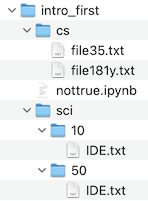

In [9]:
from IPython import display
#
# this is in the hw1pr1 folder
#
display.Image("./intro_first_ss_small.png")   # local image

See if you can match the _syntactic_ structure (the text!) with the _visual_ structure (the image!) 

<hr>

Onward!

In [32]:
path = "./intro_first"          # any path to any folder
result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # try c:/  (it took my machine 12.7 seconds!)
print(f"{result = }")

len(result) = 5
result = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


#### Now, let's incorporate ``os.walk`` into a series of functions...

In [33]:
#
# Steppingstone, Version 1: call os.walk, return length, optionally print
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    # print(f"{len(result) = }")
    # print(f"{result = }")
    num_folders = len(result)        # the len is the number of folders...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 5

[[ Fin. ]]


Ok!  But we didn't actually "walk" the folders -- or files! 

That is, we only counted, and didn't <u>consider</u>, each one...

Let's print all of the folder names!


In [ ]:
#
# Steppingstone, Version 2: print all of the folder names!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        print(f"{currentpath = }")   # try non-f printing: it's worse!

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


If you're on Windows, you likely see some "hidden MACOSX" directories, ``__MACOSX``

<font color="DodgerBlue"><b>Task!</b></font> 

Change the above code so that it _skips_ any path that contains the string ``__MACOSX``

We'll do this together...

<hr>

But, we want to see the files!

Let's print all their full filenames (the full paths)!

In [ ]:
#
# Steppingstone, Version 3: walk all of the files, printing each one's fullpath
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...

        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top

        print(f"{currentpath = }") 
        
        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"{contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


**Aside**: &nbsp;&nbsp; It's possible to assemble paths using the operating system's "correct" character:

In [36]:
os.path.join("/root/Users/secret_stuff" , "file_name")

'/root/Users/secret_stuff/file_name'

Notice that it _joined_ the path and the file.

<br>

Since Python is happy with ``/`` we'll use that for now.

<hr>

#### But, we want to get all of the files' _contents_  !

<u>Notice</u> there are lots of files named ``".DS_Store"`` ...

They are binary data used by MacOS - they will cause trouble!

Let's see the trouble, and then fix it:

In [ ]:
#
# Steppingstone, Version 4: walk all of the files, printing (bits of) each one's contents!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            print(f"   {contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


#### The encoding was wrong!  

(Those ``.DS_store`` files are binary, not human-readable.)

We could change to, say, latin-1 and see the bytes. But, let's not...

We really just want to _algorithmically_ skip over those files. Let's try it:

<font color="DodgerBlue"><b>Task to try</b></font>

Add an if statement in the above "steppingstone function" in order to simply skip over any file that begins with a dot (a period character: ``"."``)

Then, run it again. (It's ok to leave those dot files' pathnames - or not...)

<hr>

####  Two examples leading into our 10,000-file challenges! 

<u>Example 1</u> &nbsp; Let's count how many ``.txt`` files we have... 

In [ ]:
#
# Rolodex lead-in, example1: counting the number of .txt files...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt":
                print("Found a .txt file! Adding one...")
                count_txt += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_txt   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num txt files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


<font color="DodgerBlue"><b>This is an example</b></font> of a short (1-3 sentence) markdown cell, giving interpretation and context for the above result...

#### Number of ``.txt`` files
  + It seems that this folder, ``intro_first`` has four (4) ``.txt`` files.  This seems reasonable!
  + We could go further and see what _percentage_ of files are ``.txt`` ... 
  + It's also worth noting that we're trusting the file extension ``.txt`` here: some text files could be masquerading as other things... 😊?!

The key idea is to ...
  + share the results found, contextualized for us sapiens ...
  + consider what else could be done, even if we're not doing so ...
  + note possible incompletenesses, countervailing forces, concerns in general ...
  + use emojis 🦔 !

<hr>

####  Second example: using file *contents* 

<u>Example 2</u> &nbsp; Let's count how many of the ``.txt`` files contain the substring ``'CS'`` -- not in the filename, but in the file ***contents***

In [ ]:
#
# Rolodex lead-in, example2: counting the number of .txt files containing 'CS' ...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files
    count_CS = 0     # keep count of 'CS' substrings found

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot

            if file[-4:] == ".txt":
                # print("Found a .txt file! Adding one...")
                count_txt += 1
                contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
                if 'CS' in contents:
                    print("        *** Found a 'CS' ... adding 1    (aka 2-True)")
                    count_CS += 1
                # print(f"   {contents[0:42] = }")

    return count_CS, count_txt   # oooh... we can return two things!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    count_CS, count_txt = result
    print()
    print(f"num txt files       = {count_txt}")  
    print(f"num containing CS   = {count_CS}")  
    perc = count_CS*100/count_txt
    print(f"for a CS percentage of {perc:5.2f}%")   # :5.2f means width of 5, 2 dec. places, for a _floating pt value

    print("\n[[ Fin. ]]")        # sign off


<font color="Coral"><b>Results:</b></font> 

#### Number of ``CS``-content ``.txt`` files
  + It seems that this folder, ``intro_first`` has two ``'CS'``-containing ``.txt`` files, out of four total ``.txt`` files, that is, ``50%`` <br><br>
  + <u>Reflection</u>: _This seems computationally balanced._ <br><br>
  + <u>Opportunities</u>: We could go further and try this in larger folders - such as this whole machine! Or, we could look for other things (like phone numbers or names in various formats). Or, really, we could ask-and-answer almost any algorithmic question about any subset of files on any machine at all... <br><br>
  +   _The fox knows many things, but the hedgehog knows one big thing._ - [Archilochus](https://www.goodreads.com/author/quotes/7614908.Archilochus#:~:text=Archilochus%20Quotes&text=We%20don't%20rise%20to,the%20level%20of%20our%20training.&text=The%20fox%20knows%20many%20things,hedgehog%20knows%20one%20big%20thing.&text=Heart%2C%20my%20heart%2C%20so%20battered,the%20men%20who%20hate%20us.) 🦔 

#### Trying other directories/folders

The ``path`` can be _any_ folder on your local machine, allowing for _arbitrary_ local exploration and discovery...

For example, this next cell will count <font color="Coral"><b>how many folders</b></font> do I have, starting at some ``path``
+ to count <font color="Coral"><b>files</b></font>, you'll need to build from the examples above

In [40]:
path = "./intro_first"          # any path to any folder?!  intro_first contains _5_ folders total
# path = "./intro_second"       # any path to any folder?!  intro_second contains _12_ folders total
# path = "./files_challenge"    # this is the really large folder: it contains _23_ folders total

# path = "C:/"                  # could use C:/  on windows or "/" on MacOS  
# path = "."                    # could use "." for the current directory

result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # this took my machine 2m 47.4s seconds (for "/" with total 555695 folders)
                                # and, it asked for permission a couple of times (I said no.)
#print(f"{result = }")          # let's _not_ print it out...

len(result) = 5


#### <font color="DodgerBlue"><b>Your task</b></font>: The Rolodex challenge!
+ Here is [the homework page that describes hw1's challenges...](https://docs.google.com/document/d/1SXgPlR00aIxahDi3OYR8y9-AODNwBuLbQsLLt9AKSa4/edit)
+ A few questions are "our" design
+ Then, ask-and-answer more are of _your_ design
+ And, you'll answer _your_ questions from at least two other "root" directories (the ``path`` that gets everything started is sometimes called the "root": the folder whose files your functions _walk_! :)
+ Create a short <font color="Coral"><b>Results:</b></font> section after each of "our" and _your_ questions. Feel free to use the template above.
+ Good luck, walking <i>far more</i> than one thousand files!

<br>


In [213]:
cd '/Users/amandadee/Desktop/week1.1/week1_sum24/hw1pr1'

/Users/amandadee/Desktop/week1.1/week1_sum24/hw1pr1


### [[Part A]]    Phone-number files

In [ ]:
# How many .txt files are in the entire folder? 
# Hint: the starting file, above, helps a lot on this one!  It's many thousands of them...

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt":
                print("Found a .txt file! Adding one...")
                count_txt += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_txt   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "."       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num txt files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off

#### Number of ``.txt`` files
  + Folder ``hw1pr1`` from path '/Users/amandadee/Desktop/week1.1/week1_sum24/hw1pr1' has 11892 ``.txt`` files
  + Sounds about right for a large phonebook of files (around 10,000)

In [ ]:
# What is the maximum depth of directories in the entire folder (in other words, what's the maximum number of times that it's possible to move deeper into a subdirectory, overall)? 
# Hint: count the number of forward-slashes and backward-slashes!
# How to count?  Here is an example:    'geese'.count('e')  returns 3.    'a/b/c'.count('/')  returns 2.
# Try small examples in a custom cell (it's tricky with the '\\' character, so you'll want to pre-debug this!
# Key:  it's discovery -- don't try to solve it, rather explore + discover your way, zig-zag'ing towards useful stuff!

import os
import os.path

def max_depth(path):
    max_depth = 0

    result = os.walk(path)     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        print(f"{currentpath = }")   # try non-f printing: it's worse!

        depth = max(currentpath.count('/'),currentpath.count('\\')) # to get separator slashes

        max_depth = max(max_depth,depth) # store new max depth if depth is greater than previously stored

    return max_depth

path = "."
result = max_depth(path)
print(f"Maximum directory depth: {result}")


#### Maximum depth of directories in the entire folder
  + Folder ``hw1pr1`` seems to have a maximum directory depth of 10!
  + Probably would comment out print(f"{currentpath =}") and print the full longest filepath to double check the max directory depth.

In [ ]:
# Across all of the files, how many of the phone numbers contain exactly 10 digits? 7 digits? 11 digits? 
# Hint:  Remember the function from week0 where you extracted only  the digits?  That will be helpful!
# Here, you might want a function with an extra input to indicate the number of digits to search for!

# Of the exactly-ten-digit phone numbers, how many are in the area code 909 (the area code will be the first three digits of a ten-digit number). 
# Hint: cleaning, slicing, Python - yay!

# Are there any phone numbers that have more than 10 digits? 

import os

def just_digits(s):
    ''' returns only the digits in input string s '''
    digits = []

    for i in s:
        if i.isdigit():
            digits.append(i)

    return ''.join(digits)

def file_walker(path,exact_digits = None):
    ''' returns number of phone numbers that contain exactly 7,10,11(,12,13) digits '''
    ''' also counts how many of the 10-digit numbers are in the area code 909 '''
    result = list(os.walk(path))  # perhaps try w/o converting to a list...
    
    count_digits = {7:0,10:0,11:0,12:0,13:0}  # dictionary to store counts of 7,10,11(,12,13) digit lengths
    count_909 = 0 # keep count of 909 phone numbers

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:
            continue
        
        for file in files:
            if file.startswith('.') or not file.endswith('.txt'):
                continue
            
            fullpath = os.path.join(currentpath, file)
            with open(fullpath, 'r', encoding='utf-8', errors='ignore') as f:
                contents = f.read()
                digits = just_digits(contents)
                length = len(digits)
                
                if length in count_digits:  # only count lengths if 7,10,11(,12,13) digits
                    count_digits[length] += 1

                    if length == 10 and digits.startswith("909"): # only count phone numbers if in the area code 909
                        count_909 += 1
    
    return count_digits, count_909

path = "."
count_digits, count_909 = file_walker(path)
for length in [7,10,11,12,13]:
    print(f"Total {length}-digit phone numbers: {count_digits[length]}")
print(f"Total 10-digit phone numbers in area code 909: {count_909}")

#### Total phone numbers that have exactly 7, 10, 11 digits
  + Digits dictionary {7 : 1216, 10 : 10375, 11 : 80} where key is [7,10,11] and values are [1216,10375,80] 
  + Human insight needed to be inputted to know that phone numbers are either 7 digits, 10 with area code, and 11 with country code. How else might it be coded otherwise? 

#### Total phone numbers that are in the area code 909 (assume 10 digits)
  + 1188 phone numbers with area code 909. That should be a little less than the total number of students of CMC! Assuming all are local to the Inland Empire region or international and got their numbers around here. 
  + What more might be done.. record the different countries by assuming local (US) phone numbers as 7 digits, 10 digits, or 11 digits starting with '+1' or '1' using just_digits(). Hmm what about countries with country code that has 2 numbers i.e. New Zealand +64 thus making it 12 digits..

In [ ]:
# How many people have your last name?    
# Hint#1:   use the presence of a comma to determine whether the last name is 1st or 2nd!
# Hint#2:   watch out for newline characters, '\n'    Consider s.split('\n'), s.strip(), s.startswith, …

# Choose another first name present:  How many people have that last name?

# How many people have your first name? 

# Choose another first name present: How many people have that first name?
# The answers to these 4 questions are collated in the following markdown

import os

def get_string_from_file(filepath):
    try:
        with open(filepath, "r", encoding="utf-8", errors="ignore") as f:
            return f.read().strip()  # remove unnecessary whitespace
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return ""

def clean_name(name):
    ''' removes all elements other than string. '''
    return "".join([c for c in name if c.isalpha() or c == " " or c == ","]).strip() # isalpha is alphabet

def file_walker(path, target_first_name=None, target_last_name=None):
    ''' counts people by first and last names. '''
    
    first_name_count = 0
    last_name_count = 0

    for currentpath, _, files in os.walk(path):  
        if '__MACOSX' in currentpath:
            continue
        
        print(f"{currentpath = }")  

        for file in files:
            fullpath = os.path.join(currentpath, file)

            if file.startswith(".") or not file.endswith(".txt"):  
                continue  

            contents = get_string_from_file(fullpath)
            name = clean_name(contents)  

            if "," in name:
                # Format: LastName, FirstName
                parts = name.split(",")
                if len(parts) >= 2:
                    last_name = parts[0].strip().lower()
                    first_name = parts[1].strip().lower()
            else:
                # Format: FirstName LastName
                parts = name.split()
                if len(parts) >= 2:
                    first_name = parts[0].strip().lower()
                    last_name = parts[-1].strip().lower()

            # count occurrences
            if target_first_name and first_name == target_first_name.lower():
                first_name_count += 1
            if target_last_name and last_name == target_last_name.lower():
                last_name_count += 1

    return first_name_count, last_name_count

if True:
    print(f"[[ Start! ]]\n")  

    path = "."  
    target_first_name = "Emmie"  # Change this to any first name
    target_last_name = "Canel"       # Change this to any last name

    first_name_count, last_name_count = file_walker(path, target_first_name, target_last_name)

    print(f"\nTotal people with first name '{target_first_name}': {first_name_count}")
    print(f"Total people with last name '{target_last_name}': {last_name_count}")

    print("\n[[ Fin. ]]")  

#### First names and Last Names
  + How many people have your last name? 0 people have the last name 'CS35_Participant_10' 
  + Choose another last  name present: 1 people have the last name 'Canel' 
  + How many people have your first name? 2 people have the first name 'CS35_Participant_10' 
  + Choose another first name present: 5 people have the first name 'Emmie'   
  + We could check how many variations of a particular name there are e.g. Cat Cath Cathy Catherine. We could check how many variations of a particular name there are to see name popularity. 
  + We could improve this by allowing user input for names instead of hardcoding the target first and last name. 
  + I have two given names! In cases where there are more than 3 unique names to a person, I'd probably take the first entry or first entry after the comma as the first name and same thought for the last name. This assumes that folks don't prefer their second given name. 


#### Phone numbers with more than 10 digits
  + Yes! 189 phone numbers with 12-digits and 0 numbers with 13-digits
  + Made tweaks to the code earlier knowing from a google search 'Yes, there are phone numbers with more than 10 digits. The length of a phone number depends on the country. For example, China's phone numbers can have up to 13 digits, while Mozambique and Brazil's phone numbers can have up to 12 digits.'

In [ ]:
# How many people have three "i"'s somewhere in their name (not necessarily consecutiiive!)
# s.count("i") is a friend!    (This can be case sensitive/insensitive: that is up to you.)

import os

def get_string_from_file(filepath):
    try:
        with open(filepath, "r", encoding="utf-8", errors="ignore") as f:
            return f.read().strip()  # remove unnecessary whitespace
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return ""

def clean_name(name):
    ''' removes all elements other than string. '''
    return "".join([c for c in name if c.isalpha() or c == " " or c == ","]).strip() # isalpha is alphabet

def count_eyes(s):
    ''' returns the number of times i or I appears in the input string s '''
    result = 0
    for i in range(len(s)): 
        if s[i] in 'iI': 
            result += 1
    return result

def file_walker(path):
    '''counts names with at least 3 i or Is'''
    count_three_i = 0  # count names with at least 3 iIs

    for currentpath, _, files in os.walk(path):  
        if '__MACOSX' in currentpath:
            continue
        print(f"{currentpath = }")  

        for file in files:
            fullpath = os.path.join(currentpath, file)

            if file.startswith(".") or not file.endswith(".txt"):  
                continue  

            contents = get_string_from_file(fullpath)
            name = clean_name(contents)  

            i_count = count_eyes(name)  # Count 'i' and 'I' using provided method

            if i_count >= 3:
                print(f"{name} has {i_count} iIs")
                count_three_i += 1

    return count_three_i

path = "."  
count_three_i = file_walker(path)
print(f"Total people with at least 3 'iI's in their name: {count_three_i}")

#### Counting eyes in names
  + 525 people have at least 3 letter iIs in their name! - This is not consecutive and case insensitive.
  + I am guessing (less to) no people will have 3 consecutive i's in their name.

### [[Part B]]    [Exploring your own files!]   

In [ ]:
# Chosen top-level folder
cd /Users/amandadee/Desktop/cs5

In [ ]:
# How many files are there total?  (Choose somewhere with at least 42 files.)

import os
import os.path

def file_walker(path):
    """ Walks the entire directory structure from `path` 
        and counts the total number of files (all file types).
    """
    result = list(os.walk(path))  # Convert generator to list for processing
    
    total_files = 0  # Count of all files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top

        print(f"{currentpath = }") 
        
        for file in files:  
            if file.startswith("."):  
                continue 
            
            fullpath = os.path.join(currentpath, file)  #  full file path
            print(f"   {fullpath = }")  
            
            total_files += 1  

    return total_files 

path = "."  
result = file_walker(path) 

print(f"Total number of files = {result}") 

#### Number of files
  + Folder ``cs5`` from path '/Users/amandadee/Desktop/cs5' has a total of 116 files
  + Sounds about right from the multiple downloads from sophomore year !

In [ ]:
# How deep was the deepest path present?

import os
import os.path

def max_depth(path):
    max_depth = 0

    result = os.walk(path)     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        print(f"{currentpath = }")   # try non-f printing: it's worse!

        depth = max(currentpath.count('/'),currentpath.count('\\')) # to get separator slashes

        max_depth = max(max_depth,depth) # store new max depth if depth is greater than previously stored

    return max_depth

path = "."
result = max_depth(path)
print(f"Maximum directory depth: {result}")

#### Maximum directory depth
  + Folder ``cs5`` from path '/Users/amandadee/Desktop/cs5' has a maximum directory depth of 3.
  + Sounds about right since I hate having too many subfolders within main folders- I can't keep track.

In [ ]:
# How many ".py" files
import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_py = 0    # keep count of our .py files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-3:] == ".py":
                print("Found a .py file! Adding one...")
                count_py += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_py   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "."       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num py files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off

#### Number of ``.py`` files
  + Folder ``cs5`` from path '/Users/amandadee/Desktop/cs5' has 39 ``.py`` files
  + Sounds about right ~15 weeks a semester and 2 or 3 python files for each week

In [ ]:
# Which is the deepest folder 
#

import os

def deepest_folder(path):
    result = list(os.walk(path))  
    max_depth = 0
    deepest_folder = ""

    for folder_tuple in result:
        currentpath, _, _ = folder_tuple  
        depth = max(currentpath.count('/'), currentpath.count('\\'))

        if depth > max_depth:
            max_depth = depth
            deepest_folder = currentpath  

    return deepest_folder, max_depth

path = "."
deepest_folder, max_depth = deepest_folder(path)

print(f"Deepest Folder: {deepest_folder}")
print(f"Maximum Depth: {max_depth}")

#### Deepest folder
  + Knowing that my Folder ``cs5``'s maximum directory depth is 3.. it seems that the deepest folder is ``./hw3pr1_f22/notebook_version/__pycache__``
  + What if I had multiple folders with depths of 3.. next time, how would I return all of them? I assume my result above was the first one from a chronological file walkthrough.

In [ ]:
# How many files have hw in the filename aka how many hw files did i submit in sophomore year !

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_py = 0    # keep count of our .py files
    count_hw = 0     # keep count of 'hw' substrings found

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot

            if file[-3:] == ".py":
                # print("Found a .py file! Adding one...")
                count_py += 1
                
                if file.startswith("hw"):
                    print("        *** Found 'hw' in filename ... adding 1    (aka 2-True)")
                    count_hw += 1
                # print(f"   {contents[0:42] = }")

    return count_hw, count_py   # oooh... we can return two things!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    print(f"[[ Start! ]]\n")  

    path = "."  
    count_hw, count_py = file_walker(path)  

    print()
    print(f"Total .py files       = {count_py}")  
    print(f".py files containing 'hw' in filename = {count_hw}")  

    if count_py > 0:
        perc = count_hw * 100 / count_py
        print(f"Percentage of 'hw' .py files = {perc:5.2f}%")  
    else:
        print("No .py files found, so percentage calculation is not applicable.")

    print("\n[[ Fin. ]]") 

#### Number of ``hw`` in ``.py`` files
  + Folder ``cs5`` from path '/Users/amandadee/Desktop/cs5' has 39 ``.py`` files and of those 32 are entitled ``hw``
  + 32/39 = ~82% checks out! 7 of those files might include starter files, midterms, finals, misc. 